# House Price Prediction with Linear Regression

## Introduction

Welcome to the House Price Prediction project, where we employ a professional approach to develop machine learning model using Linear Regression. This project focuses on predicting house prices by leveraging key features such as square footage, the number of bedrooms, and the number of bathrooms.

## Objectives

The primary goal is to create an accurate and reliable predictive model that assists in estimating property values. By utilizing advanced techniques in linear regression, we aim to deliver a high-quality solution for house price prediction.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


In [100]:
# pip install -r requirements.txt


Load Required Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

<summary><strong>Data Description</strong></summary>

## Overview

This dataset contains information related to housing properties with various features. The primary objective is to predict the property's sale price in dollars, which serves as the target variable for the prediction task.

## Data Description

- **SalePrice:** The property's sale price in dollars (target variable).
- **Bedroom:** Number of bedrooms above basement level.
- **TotalBsmtSF:** Total square feet of basement area.
- **BsmtFullBath:** Basement full bathrooms.
- **Neighborhood:** Physical locations within Ames city limits.
- **Street:** Type of road access.
- **HouseStyle:** Style of dwelling.
- **GarageArea:** Size of the garage in square feet.
- **Kitchen:** Number of kitchens.
- **MoSold:** Month Sold.
- **SaleType:** Type of sale.
- **SaleCondition:** Condition of sale.


<details>

- **SalePrice:** The property's sale price in dollars (target variable).
- **MSSubClass:** The building class.
- **MSZoning:** The general zoning classification.
- **LotFrontage:** Linear feet of street connected to the property.
- **LotArea:** Lot size in square feet.
- **Street:** Type of road access.
- **Alley:** Type of alley access.
- **LotShape:** General shape of the property.
- **LandContour:** Flatness of the property.
- **Utilities:** Type of utilities available.
- **LotConfig:** Lot configuration.
- **LandSlope:** Slope of the property.
- **Neighborhood:** Physical locations within Ames city limits.
- **Condition1:** Proximity to the main road or railroad.
- **Condition2:** Proximity to the main road or railroad (if a second is present).
- **BldgType:** Type of dwelling.
- **HouseStyle:** Style of dwelling.
- **OverallQual:** Overall material and finish quality.
- **OverallCond:** Overall condition rating.
- **YearBuilt:** Original construction date.
- **YearRemodAdd:** Remodel date.
- **RoofStyle:** Type of roof.
- **RoofMatl:** Roof material.
- **Exterior1st:** Exterior covering on the house.
- **Exterior2nd:** Exterior covering on the house (if more than one material).
- **MasVnrType:** Masonry veneer type.
- **MasVnrArea:** Masonry veneer area in square feet.
- **ExterQual:** Exterior material quality.
- **ExterCond:** Present condition of the material on the exterior.
- **Foundation:** Type of foundation.
- **BsmtQual:** Height of the basement.
- **BsmtCond:** General condition of the basement.
- **BsmtExposure:** Walkout or garden level basement walls.
- **BsmtFinType1:** Quality of basement finished area.
- **BsmtFinSF1:** Type 1 finished square feet.
- **BsmtFinType2:** Quality of the second finished area (if present).
- **BsmtFinSF2:** Type 2 finished square feet.
- **BsmtUnfSF:** Unfinished square feet of basement area.
- **TotalBsmtSF:** Total square feet of basement area.
- **Heating:** Type of heating.
- **HeatingQC:** Heating quality and condition.
- **CentralAir:** Central air conditioning.
- **Electrical:** Electrical system.
- **1stFlrSF:** First Floor square feet.
- **2ndFlrSF:** Second floor square feet.
- **LowQualFinSF:** Low-quality finished square feet (all floors).
- **GrLivArea:** Above grade (ground) living area square feet.
- **BsmtFullBath:** Basement full bathrooms.
- **BsmtHalfBath:** Basement half bathrooms.
- **FullBath:** Full bathrooms above grade.
- **HalfBath:** Half baths above grade.
- **Bedroom:** Number of bedrooms above basement level.
- **Kitchen:** Number of kitchens.
- **KitchenQual:** Kitchen quality.
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms).
- **Functional:** Home functionality rating.
- **Fireplaces:** Number of fireplaces.
- **FireplaceQu:** Fireplace quality.
- **GarageType:** Garage location.
- **GarageYrBlt:** Year the garage was built.
- **GarageFinish:** Interior finish of the garage.
- **GarageCars:** Size of the garage in car capacity.
- **GarageArea:** Size of the garage in square feet.
- **GarageQual:** Garage quality.
- **GarageCond:** Garage condition.
- **PavedDrive:** Paved driveway.
- **WoodDeckSF:** Wood deck area in square feet.
- **OpenPorchSF:** Open porch area in square feet.
- **EnclosedPorch:** Enclosed porch area in square feet.
- **3SsnPorch:** Three-season porch area in square feet.
- **ScreenPorch:** Screen porch area in square feet.
- **PoolArea:** Pool area in square feet.
- **PoolQC:** Pool quality.
- **Fence:** Fence quality.
- **MiscFeature:** Miscellaneous feature not covered in other categories.
- **MiscVal:** $Value of miscellaneous features.
- **MoSold:** Month Sold.
- **YrSold:** Year Sold.
- **SaleType:** Type of sale.
- **SaleCondition:** Condition of sale.

</details>


<h2 id="reading_data">Reading the data in</h2>


In [102]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's select some features that we want to use for regression.


In [143]:

cdf = df[['Kitchen','Bedroom','GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF','SalePrice']]
cdf.head()

,Kitchen,Bedroom,GarageArea,LotArea,YearBuilt,BsmtFinSF1,TotalBsmtSF,SalePrice
0,1,3,548,8450,2003,706,856,208500
1,1,3,460,9600,1976,978,1262,181500
2,1,3,608,11250,2001,486,920,223500
3,1,3,642,9550,1915,216,756,140000
4,1,4,836,14260,2000,655,1145,250000


Let's plot Emission values with respect to SalePrice:


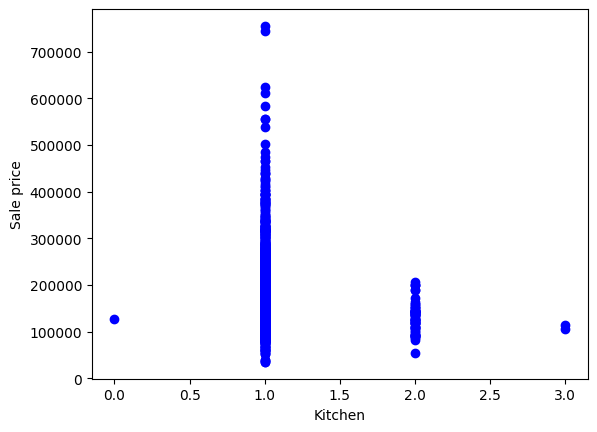

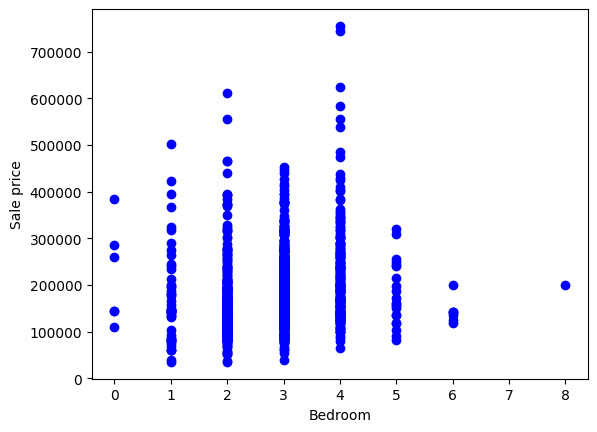

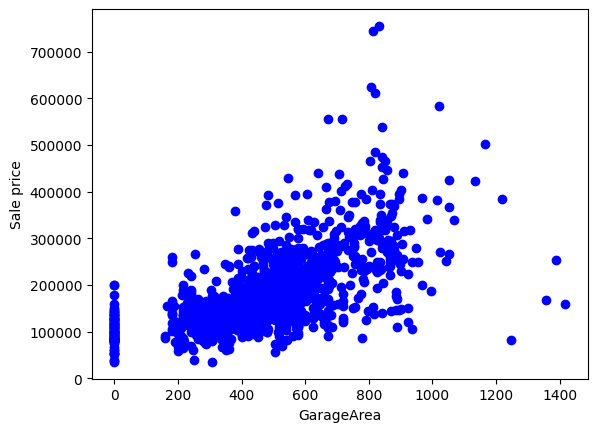

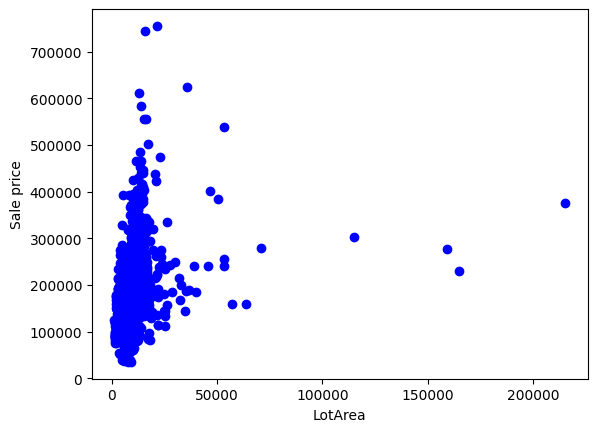

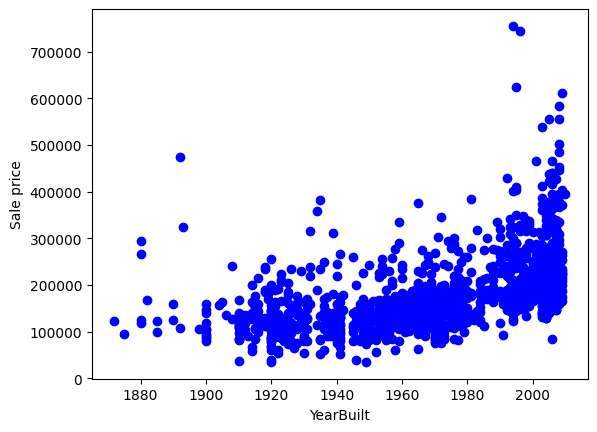

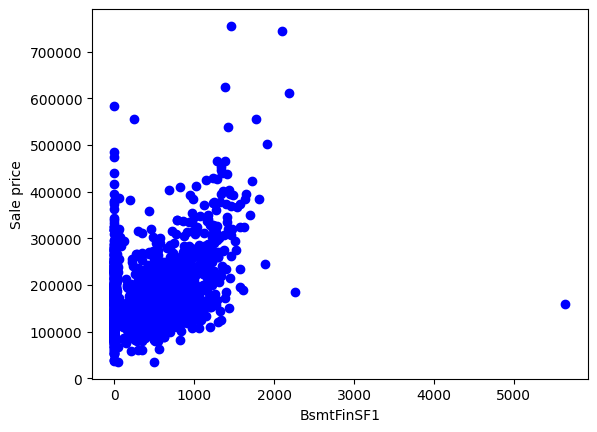

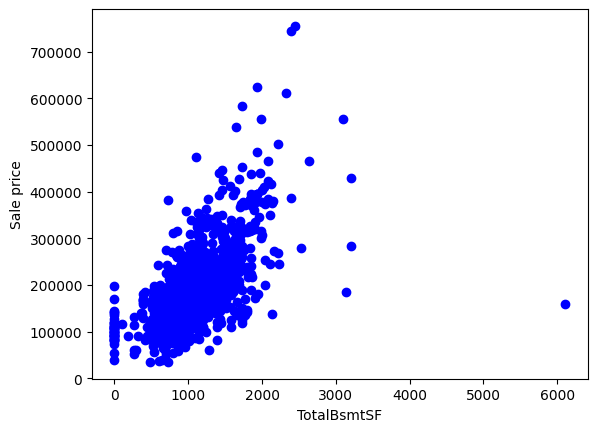

In [144]:
for value in ['Kitchen','Bedroom','GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF']:
    plt.scatter(cdf[value], cdf.SalePrice,  color='blue')
    plt.xlabel(value)
    plt.ylabel("Sale price")
    plt.show()
# cdf.hist()

## Observation

Upon analyzing the plot, it is evident that the sale price exhibits a linear relationship with  the total square feet of basement area (`TotalBsmtSF`), the garage area (`GarageArea`), (`LotArea`), (`YearBuilt`), and (`BsmtFinSF1`).

This suggests that as the total basement area or garage area increases, the sale price tends to follow a linear trend, indicating a positive correlation between these features and the property's value.

Further exploration and analysis of these relationships could provide valuable insights into the factors influencing house prices in this dataset.


In [145]:
cdf = cdf[['GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF','SalePrice']]
cdf.head()

,GarageArea,LotArea,YearBuilt,BsmtFinSF1,TotalBsmtSF,SalePrice
0,548,8450,2003,706,856,208500
1,460,9600,1976,978,1262,181500
2,608,11250,2001,486,920,223500
3,642,9550,1915,216,756,140000
4,836,14260,2000,655,1145,250000


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 


In [131]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


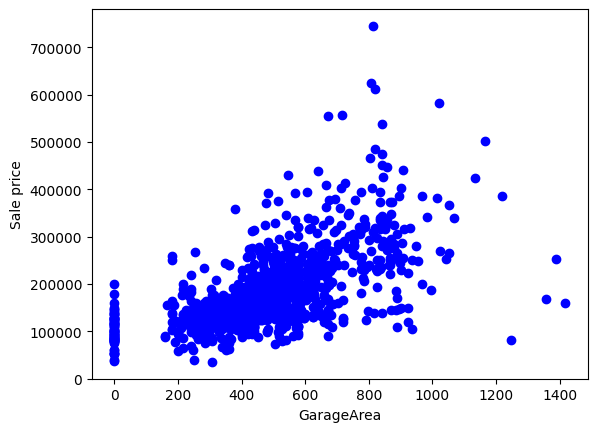

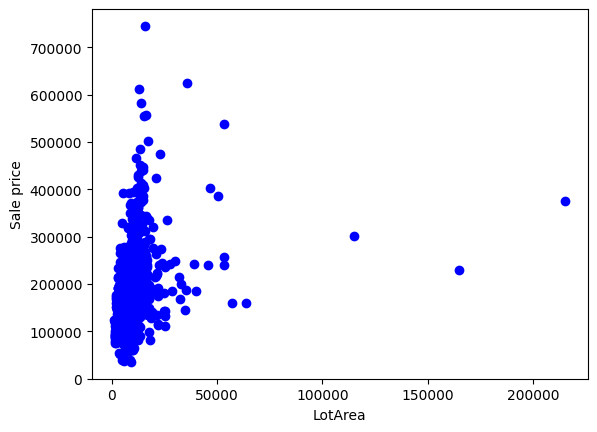

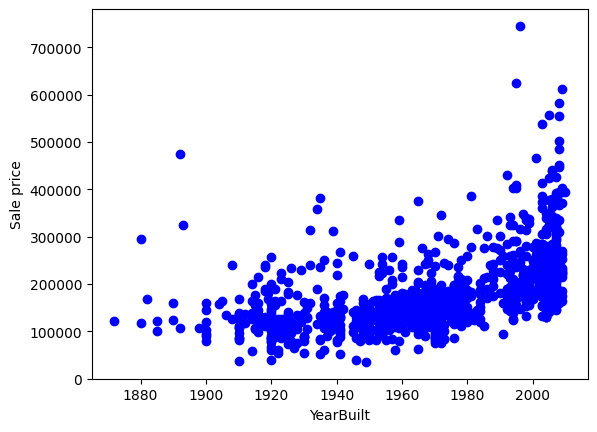

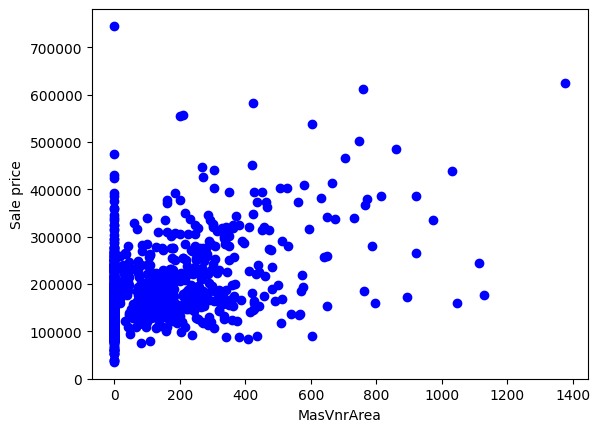

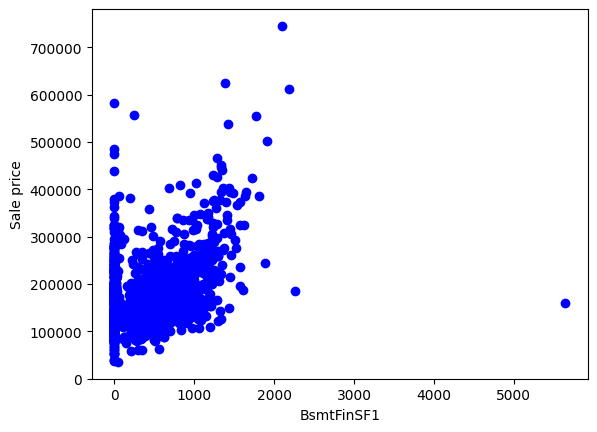

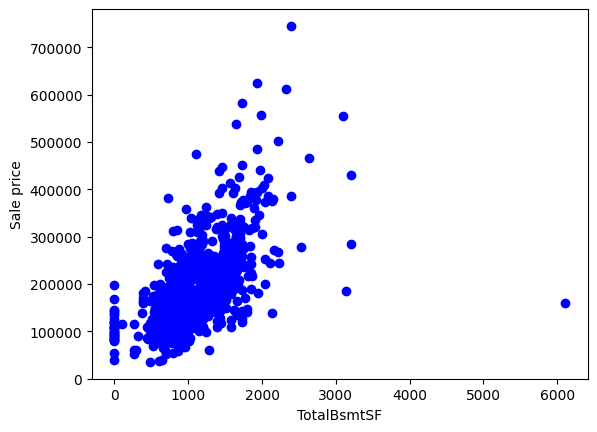

In [133]:
for value in ['GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF']:
    plt.scatter(train[value], train.SalePrice,  color='blue')
    plt.xlabel(value)
    plt.ylabel("Sale price")
    plt.show()
# cdf.hist()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In [150]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[['GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF']])
train_y = np.asanyarray(train[['SalePrice']])
regr.fit(train_x,train_y)
print ('Coefficients: ', regr.coef_)
print('Intersect', regr.intercept_)

Coefficients:  [[116.00467975   0.90703938 664.59928386   3.96051961  55.59530408]]
Intersect [-1253956.31224437]


<h2 id="prediction">Prediction</h2>


In [153]:
test_x = np.asanyarray(test[['GarageArea','LotArea','YearBuilt','BsmtFinSF1','TotalBsmtSF']])
test_y = np.asanyarray(test[['SalePrice']])
prediction = regr.predict(test_x)
print("Mean Squared Error (MSE) : %.2f"  % np.mean((prediction - test_y) ** 2))

# regr.score(x,y) x is the test_x and y is the test_y.. it compares the prediction from test_x with test_y
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean Squared Error (MSE) : 2478506388.58
Variance score: 0.60


In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x = np.asanyarray(cdf[['Bedroom','TotalBsmtSF','GarageArea','Kitchen','MoSold']])
y = np.asanyarray(cdf[['SalePrice']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y , regr.predict(x)) )
test = pd.read_csv("data/test.csv")
test = test[['Bedroom','TotalBsmtSF','GarageArea','Kitchen','MoSold']]
test_x = np.asanyarray(test)
test_y = regr.predict(test_x)
